# Structural estimation

### Ex 1

(a)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import math

In [2]:
meddata = np.loadtxt('clms.txt')

In [3]:
print('Mean: \t', meddata.mean(), "\n"\
     'Median: \t', np.median(meddata), '\n'\
     'Max: \t', meddata.max(), '\n'\
     'Min: \t', meddata.min(), '\n')

Mean: 	 720.2779753272437 
Median: 	 172.21 
Max: 	 227967.25 
Min: 	 0.01 



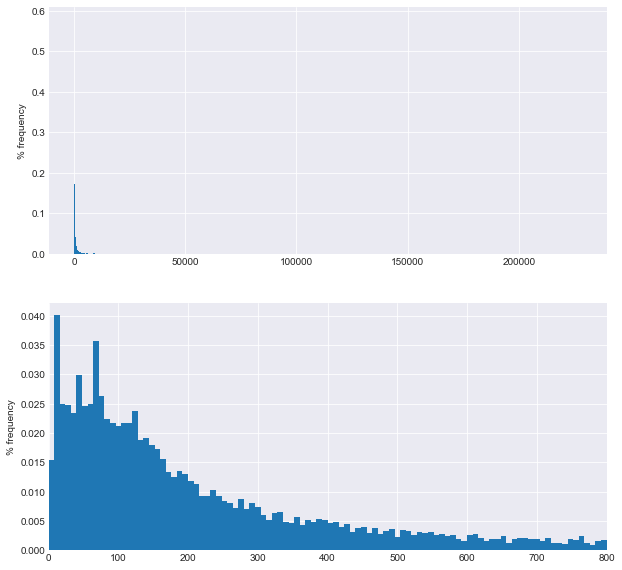

In [4]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 10))
palette = plt.get_cmap('Dark2')

weights = (1 / meddata.shape[0]) * np.ones_like(meddata)

plt.subplot(2, 1, 1)
plt.hist(meddata, bins=1000, weights=weights)
plt.ylabel('% frequency')

plt.subplot(2, 1, 2)
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
plt.xlim(0, 800)
plt.ylabel('% frequency')

plt.show()

(b)

In [9]:
def gamma_pdf(x, a, b): 
    '''Get me the gamma prob dist for some data'''
    G = math.gamma(a)
    pdf = (1/((b**a)*G))*(x**(a-1))*(np.exp(-(x/b)))
    return pdf
    
def log_lik_gam(xvals, alpha, beta):
    '''Get me the log likelihood of the gamma pdf for some data'''
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gamma(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    a, b = params
    x = args
    log_lik_val = log_lik_gam(x, a, b)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val

In [10]:
b_init = meddata.var()/meddata.mean()  # initial guess at b
a_init = meddata.mean()/b_init  # initial guess at a
params_init = np.array([a_init, b_init])

In [19]:
mle_args = (meddata)
results = opt.minimize(crit_gamma, params_init, args=meddata, method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
a_MLE, b_MLE = results.x
loglikval = -results.fun
print('a_MLE=', a_MLE, ' b_MLE=', b_MLE, 'Loglikvalmax=', loglikval)

a_MLE= 0.22175531700084541  b_MLE= 21911.06469927569 Loglikvalmax= -82076.45160566496


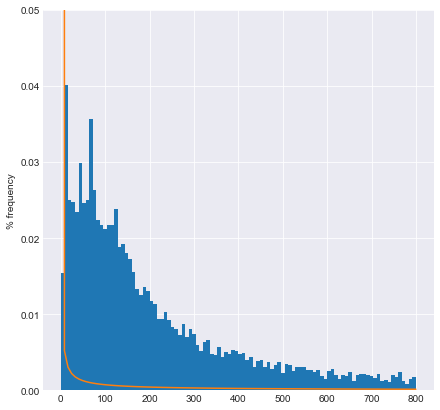

In [23]:
plt.figure(figsize=(7, 7))
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
dom = np.linspace(1e-5, 800, 100)
plt.plot(dom, gamma_pdf(dom, a_MLE, b_MLE))
plt.ylim(0, 0.005)
plt.ylabel('% frequency')
plt.show()

(c)

In [26]:
def gg_pdf(x, a, b, m): 
    '''Get me the generalised gamma pdf'''
    G = math.gamma(a/m)
    pdf = (m/((b**a)*G))*(x**(a-1))*(np.exp(-(x/b)**m))
    return pdf
    
def log_lik_GG(xvals, alpha, beta, m):
    '''Get me the generalised log likelihood'''
    pdf_vals = gg_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GG(params, *args):
    '''criterion function for generalised gamma'''
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

a_ML_gE= 0.2217491329814365  b_MLE_g= 21911.06442624912 m_MLE_g= 0.9970313341356132 Loglikvalmax= -82076.44682981074


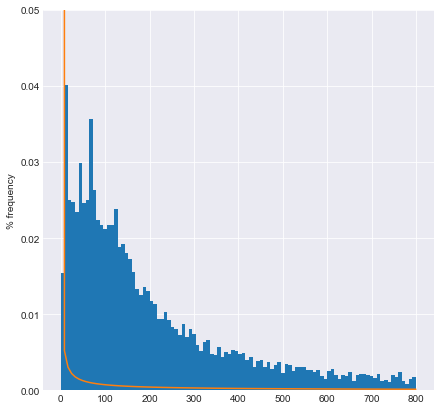

In [28]:
#Proceeding as before...

b_init_2 = b_MLE  # initial guess at b
a_init_2 = a_MLE  # initial guess at a
m_init_2 = 1
params_init_2 = np.array([a_init_2, b_init_2, m_init_2])

results_2 = opt.minimize(crit_GG, params_init_2, args=meddata, method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None), (1e-5, None) ))
a_MLE_g, b_MLE_g, m_MLE_g = results_2.x
loglikval_2 = -results_2.fun
print('a_ML_gE=', a_MLE_g, ' b_MLE_g=', b_MLE_g, 'm_MLE_g=', m_MLE_g, 'Loglikvalmax=', loglikval_2)

plt.figure(figsize=(7, 7))
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
dom = np.linspace(1e-5, 800, 100)
plt.plot(dom, gg_pdf(dom, a_MLE_g, b_MLE_g, m_MLE_g))
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.show()

(d)

In [34]:
import scipy
def gb2_pdf(x, a, b, p, q): 
    '''Get me the generalised beta 2 dist'''
    top = a*x**(a*p-1)
    bottom  = b**(a*p)* scipy.special.beta(p, q)*(1 + (x/b)**a)**(p+q)
    return top/bottom
    
def log_lik_GB2(xvals, a, b, p, q):
    '''Get me the log likelihood'''
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GB2(params, *args):
    'Criterion function, i.e. negative log likelihood'
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

a_MLE_b= 0.10746439856808389  b_MLE_b= 4451892.226810002 p_MLE_b= 51.21534885333929 q_MLE_b= 150.41330383957978 Loglikvalmax= -74877.5875438232


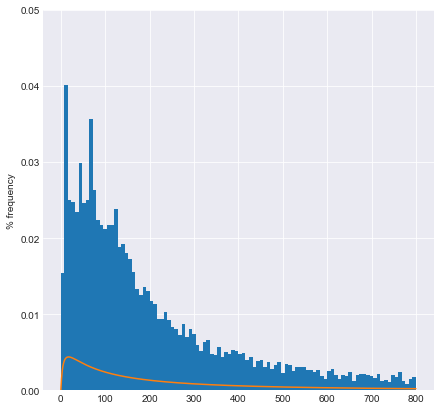

In [42]:
#Proceeding as before...

b_init_3 = b_MLE_g*200**(1/m_MLE_g)  # initial guess at b
a_init_3 = m_MLE_g  # initial guess at a
p_init_3 = a_MLE_g/b_MLE_g
q_init_3 = 200

params_init_3 = np.array([a_init_3, b_init_3, p_init_3, q_init_3])

results_3 = opt.minimize(crit_GB2, params_init_3, args=meddata, method ='L-BFGS-B', bounds=((1e-5, None),\
                                                                                            (1e-5, None),\
                                                                                            (1e-5, None),\
                                                                                            (1e-5, None) ), tol=1e-10)
a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b = results_3.x
loglikval_3 = -results_3.fun
print('a_MLE_b=', a_MLE_b, ' b_MLE_b=', b_MLE_b, 'p_MLE_b=', p_MLE_b, 'q_MLE_b=', q_MLE_b, 'Loglikvalmax=', loglikval_3)

plt.figure(figsize=(7, 7))
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
dom = np.linspace(1e-5, 800, 1000)
plt.plot(dom, gb2_pdf(dom, a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b))
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.show()

(e)

In [56]:
import scipy.stats as sts

log_lik_h0 = log_lik_GB2(meddata, a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b)
log_lik_h1c = log_lik_GG(meddata, a_MLE_g, b_MLE_g, m_MLE_g)
log_lik_h1b = log_lik_gam(meddata, a_MLE, b_MLE)

LR_val_b = -2 * (log_lik_h1b - log_lik_h0)
LR_val_c = -2 * (log_lik_h1c - log_lik_h0)
chi_b = 1 - sts.chi2.cdf(LR_val_b, df = 4)
chi_c = 1 - sts.chi2.cdf(LR_val_c, df = 4)
print('chi squared LR test p value b vs d = ', chi_b)
print('chi squared LR test p value c vs d = ', chi_c)

chi squared LR test p value b vs d =  0.0
chi squared LR test p value c vs d =  0.0


(f)

In [57]:
from scipy import integrate
prob_GB2_1000 = integrate.quad(gb2_pdf,1000, np.inf
                               ,args = (a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b))
                                                              
prob_GA_1000 = integrate.quad(gamma_pdf, 1000, np.inf,
                              args = (a_MLE, b_MLE))
print("Probability_GB2 of healthcare claim above 1000: ", prob_GB2_1000[0])
print("Probability_GA of healthcare claim above 1000: ", prob_GA_1000[0])

Probability_GB2 of healthcare claim above 1000:  0.13158995906022686
Probability_GA of healthcare claim above 1000:  0.45195973551759305


### Ex 2